<a href="https://colab.research.google.com/github/Sohyla03Said/feature-extraction-and-matching/blob/main/rectangle%20shape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python-headless matplotlib

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image

In [7]:
query_path = '/content/Screenshot 2025-04-19 200004.png'
target_path = '/content/fresh-vegetables-vegetable-icon-vegan-food-cucumber-tomato-broccoli-eggplant-cabbage-peppers-peas-carrots-onions-vector-icons-85278849.webp'

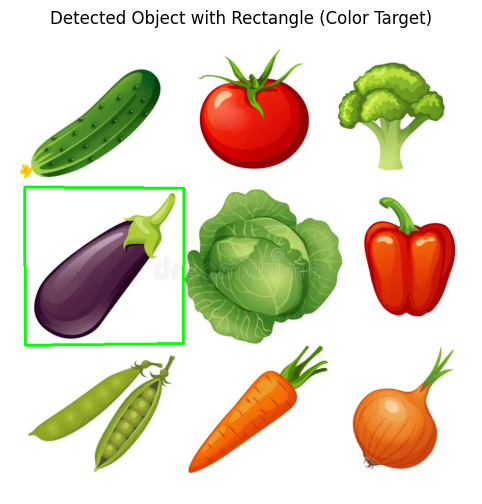

In [8]:
img1_gray = cv2.imread(query_path, cv2.IMREAD_GRAYSCALE)        # Query image (grayscale)
img2_color = cv2.imread(target_path, cv2.IMREAD_COLOR)          # Target image (color)
img2_gray = cv2.cvtColor(img2_color, cv2.COLOR_BGR2GRAY)        # Target image (grayscale copy)

# 📌 Step 5: SIFT feature detection
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1_gray, None)
kp2, des2 = sift.detectAndCompute(img2_gray, None)

# 📌 Step 6: FLANN matcher
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

# 📌 Step 7: Apply Lowe's ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# 📌 Step 8: Homography and draw bounding rectangle
if len(good_matches) > 10:
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    h, w = img1_gray.shape
    corners = np.float32([[0, 0], [0, h], [w, h], [w, 0]]).reshape(-1, 1, 2)
    transformed_corners = cv2.perspectiveTransform(corners, M)

    # Draw rectangle on the original COLOR image
    cv2.polylines(img2_color, [np.int32(transformed_corners)], isClosed=True, color=(0, 255, 0), thickness=4)

    # Show the result
    plt.figure(figsize=(12, 6))
    plt.imshow(cv2.cvtColor(img2_color, cv2.COLOR_BGR2RGB))
    plt.title("Detected Object with Rectangle (Color Target)")
    plt.axis('off')
    plt.show()
else:
    print("Not enough good matches found.")